In [12]:
import pandas as pd
import matplotlib.pyplot as plt

# Global sensor column names (ensure these match your CSV file)
column_names = ["Gyroscope X", "Gyroscope Y", "Gyroscope Z", 
                "Acceleration X", "Acceleration Y", "Acceleration Z"]

# Define the colors for the X, Y, and Z channels
colors = [(220/255, 100/255, 100/255),
          (245/255, 151/255, 66/255),
          (84/255, 150/255, 206/255)]

def visualize_full_data(data_file):
    """
    Loads raw sensor data from the specified CSV file and visualizes the complete time series.
    Two types of plots are generated:
      1. A grid of six subplots (2 rows x 3 columns) for each sensor channel.
      2. A combined overlay plot with two subplots:
         - Top: Overlay of gyroscope channels (sensors 1-3).
         - Bottom: Overlay of acceleration channels (sensors 4-6).
    The colors for the x, y, and z channels are set using a predefined color palette.
    """
    # Load raw data from CSV
    df = pd.read_csv(data_file)
    print("Columns in the data file:", df.columns.tolist())
    
    # Verify that all expected columns are present
    if not all(col in df.columns for col in column_names):
        print("Error: One or more required columns are missing in the file.")
        return

    # Create a time axis based on the length of the data
    time_axis = range(len(df))
    
    # -------------------------------
    # Plot each sensor channel separately (2 rows x 3 columns)
    # -------------------------------
    fig, axes = plt.subplots(2, 3, figsize=(18, 10))
    
    # Plot gyroscope channels (first row)
    for i in range(3):
        axes[0, i].plot(time_axis, df[column_names[i]], color=colors[i])
        axes[0, i].set_title(column_names[i])
        axes[0, i].set_xlabel("Time Step")
        axes[0, i].set_ylabel("Gyroscope " + r'$(^\circ ~ \mathrm{s}^{-1})$')
        axes[0, i].grid(True)
    
    # Plot acceleration channels (second row)
    for i in range(3, 6):
        axes[1, i-3].plot(time_axis, df[column_names[i]], color=colors[i-3])
        axes[1, i-3].set_title(column_names[i])
        axes[1, i-3].set_xlabel("Time Step")
        axes[1, i-3].set_ylabel("Acceleration " + r'$(\mathrm{m} ~ \mathrm{s}^{-2})$')
        axes[1, i-3].grid(True)
    
    plt.tight_layout()
    plt.show()

    # -------------------------------
    # Combined Overlay Plot: Two subplots (Gyroscope & Acceleration)
    # -------------------------------
    fig, (ax1, ax2) = plt.subplots(2, 1, figsize=(12, 8), sharex=True)
    fig.subplots_adjust(hspace=-1.0)  # Reduce the vertical spacing between subplots

    # Gyroscope overlay (sensors 1-3) in the top subplot
    for i in range(3):
        ax1.plot(time_axis, df[column_names[i]], color=colors[i], label=column_names[i])
    ax1.set_ylabel("Gyroscope " + r'$(^\circ ~ \mathrm{s}^{-1})$')
    ax1.grid(True)
    ax1.legend(loc="upper right")

    # Acceleration overlay (sensors 4-6) in the bottom subplot
    for i in range(3, 6):
        ax2.plot(time_axis, df[column_names[i]], color=colors[i-3], label=column_names[i])
    ax2.set_xlabel("Time Step")
    ax2.set_ylabel("Acceleration " + r'$(\mathrm{m} ~ \mathrm{s}^{-2})$')
    ax2.grid(True)
    ax2.legend(loc="upper right")

    plt.tight_layout()
    plt.show()

# Example usage:
# data_file = "path/to/your/raw_data.csv"
# visualize_full_data(data_file)


Columns in the data file: ['Elapsed Time (s)', 'Gyroscope X', 'Gyroscope Y', 'Gyroscope Z', 'Acceleration X', 'Acceleration Y', 'Acceleration Z']


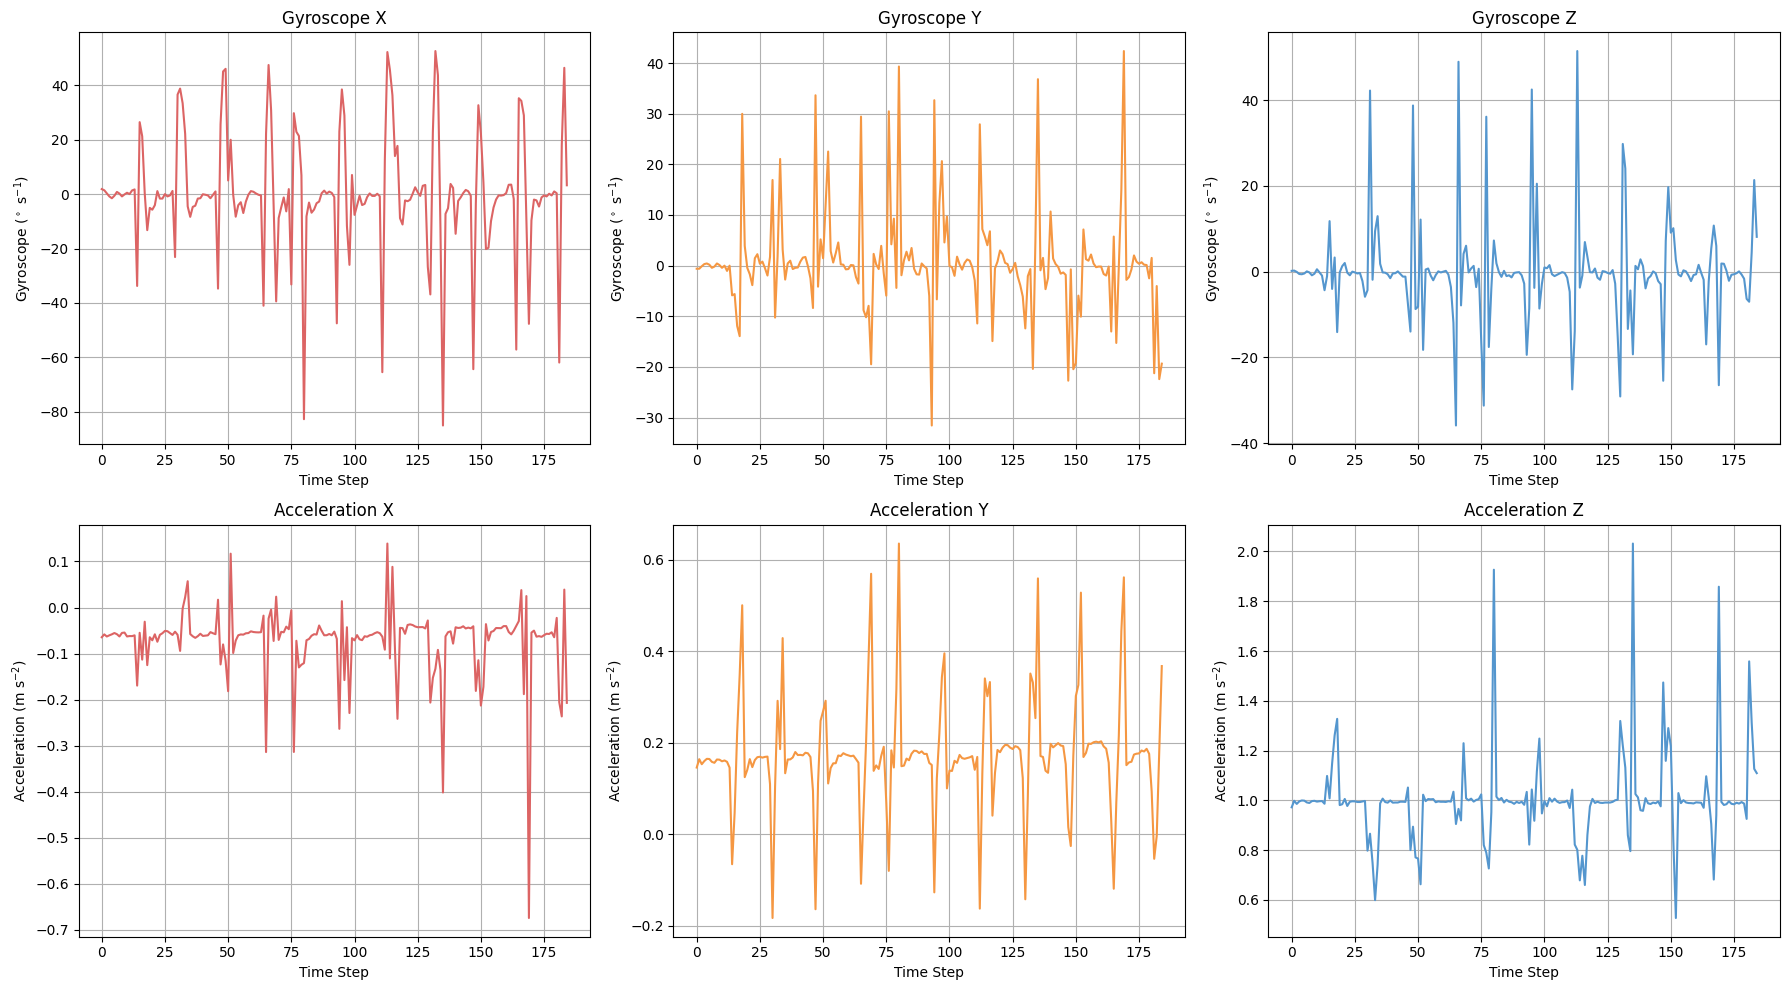

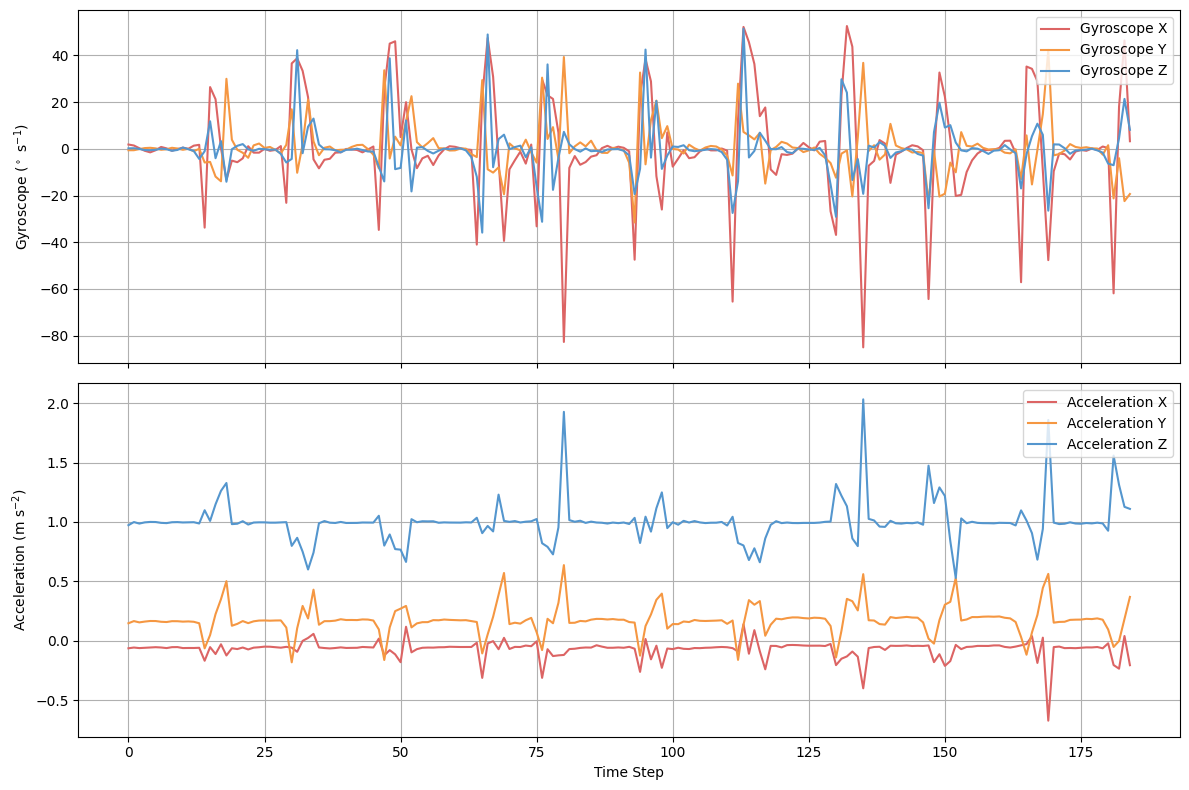

In [13]:
# Example usage:
data_file = "./dataset/train/walking1.csv"
visualize_full_data(data_file)